<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada</h1>
<h2>Pràctica 1 - Exploració: Grafs, DFS, BFS, Dijkstra</h2>
</center>
</div>

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<div class="alert alert-info">
<h2>Avís general per a les Pràctiques de Laboratori</h2>

És molt important <b>comentar tot el vostre codi</b>. Comentar el codi no només facilita a altres persones que el llegeixin la compressió del que esteu fent, sinó també a vosaltres mateixos durant el procés de disseny i implementació. D'aquesta forma podreu entendre el vostre propi codi encara que faci molt temps que no el consulteu. A més, a l'hora de ser corregits, un codi comentat s'entén molt millor, la qual cosa ajuda a traslladar al professor les idees que teníeu a l'intentar implementar-lo i encara més en el cas que no ho hagueu pogut acabar-ho amb èxit. No cal comentar cada línia, però si el que fa cada part.

En segon lloc, és molt important <b>respectar les capçaleres de les funcions i estructura de la funció ```return```</b> que s'indiquin a l'enunciat. Tot i que llegim i corregim els vostres codis en detall, fem servir correctors automàtics per guiar i agilitzar el procés i saber quines solucións funcionen i quines no ja d'entrada. 

Axí doncs, si es demana que la funció tingui la següent estructura: 

```python
def exercici1(param1, param2):
    # implementació de la solució
    return resultat 
```

És important que en el notebook existeixi aquesta funció i que no canvieu el nom dels paràmetres ni el tipus de dada retornada.
    
</div>




<div class="alert alert-warning">
<h2>Sobre la correcció d'aquesta pràctica...</h2>
Com veureu a la capçalera de cada exercici, tots ells tenen una puntuació màxima de 2.5 punts. En tots, es valoraran aquests quatre aspectes:
    <ol>
        <li> El codi <b>s'executa correctament</b>, és a dir, retorna la solució demanada.
        <li> El codi és <b>eficient</b>, és a dir, no fa més càlculs dels necessaris.
        <li> El codi està <b>ben comentat</b>. No cal comentar cada línea de codi però si que es necessari que expliqueu què s'està fent als diferents blocs.
        <li> Les preguntes (dels exercicis que en tenen) estan respostes i la solució és correcta.
    </ol>
</div>




## maze.py

La llibreria auxiliar ```maze.py```, conté les funcions necessàries per crear i dibuixar laberints aleatoris. A continuació destaquem les funcions més rellevants tot i que podeu obrir el fitxer i investigar.

- ```Maze(x_num, y_num, seed=None, p_down=0.2, p_build=0)```: Aquesta funció construeix i retorna un laberint aleatori de dimensió $x_\text{num} \times y_\text{num}$. El paràmetre $\textit{seed}$ permet fixar una llavor de forma que sempre es generi el mateix laberint. És interessant que, un cop hagueu programat la solució dels exercicis, proveu de modificar-lo per veure que funciona en diferents casos. Els paràmetres $p_\text{down}$ i $p_\text{build}$ són probabilitats de destrucció d'una paret o de construcció. Així, si $p_\text{down}$ és proper a 1, s'eliminen gairebé totes les parets del laberint, creant molts camins entre totes les cel·les. En canvi, si $p_\text{build}$ és proper a 1, es crearan parets que faran que el laberint no tingui solució per a gairebé cap parella de cel·les.

- ```maze.display_maze(height=200, plot_path=False)```: Com el seu nom indica, ens mostra el laberint que hem creat. Podem definir l'alçada del dibuix i l'amplada s'ajusta automàticament. Com veurem, podem assignar un camí a cada laberint. Si hi ha un camí assignat, el podem mostrar cridant la funció amb la variable _plot\_path = True_.

- ```maze.maze_graph()```: Aquesta funció, que no rep cap paràmetre per entrada, ens retorna un graf de la classe nx.Graph() que representa el laberint.

- ```maze.set_path(path)```: Donat un camí definit com una sequència de nodes, el podem assignar al laberint usant aquesta funció. Recorda que si vols visualitzar un camí assignat, pots fer-ho cridant a ```display_maze(plot_path=True)```.

In [2]:
from matplotlib import pyplot as plt
import networkx as nx
from maze import *

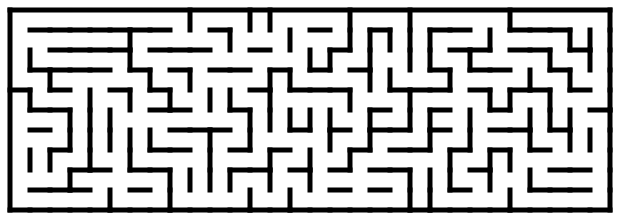

In [3]:
# Creem un laberint amb X cel·les horitzontals i Y cel.les verticals i el mostrem.
# Observeu que hem definit un 'seed'. Això vol dir que, tot i que el laberint es genera de forma aleatòria,
# tindreu tots el mateix.
maze = Maze(30, 10, seed=15)
maze.display_maze(height=200)

La longitud del camí mínim és 45
[0, 1, 2, 3, 4, 5, 6, 7, 8, 38, 39, 40, 70, 71, 72, 102, 101, 131, 132, 162, 192, 193, 194, 195, 225, 255, 256, 257, 227, 228, 229, 230, 231, 261, 291, 292, 293, 294, 264, 265, 295, 296, 297, 298, 299]


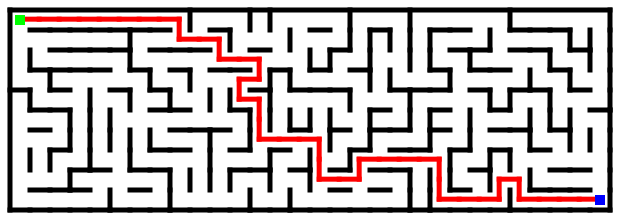

In [4]:
# Obtenim el graph associat al laberint on cada node es una cel·la i tindrem una aresta si entre dues cel·les no existeix paret
G = maze.maze_graph()

# La llibreria networX ja té una funció per trobar el camí mínim
A = 0                              # Node orígen (Verd) 
B = len(G.nodes)-1                 # Node destí  (Blau)
pth = nx.shortest_path(G, A, B)
print('La longitud del camí mínim és',len(pth))

# Afegim aquest camí al nostre laberint
print(pth)
maze.set_path(pth)

# Mostrem el resultat
maze.display_maze(plot_path=True, height=200)

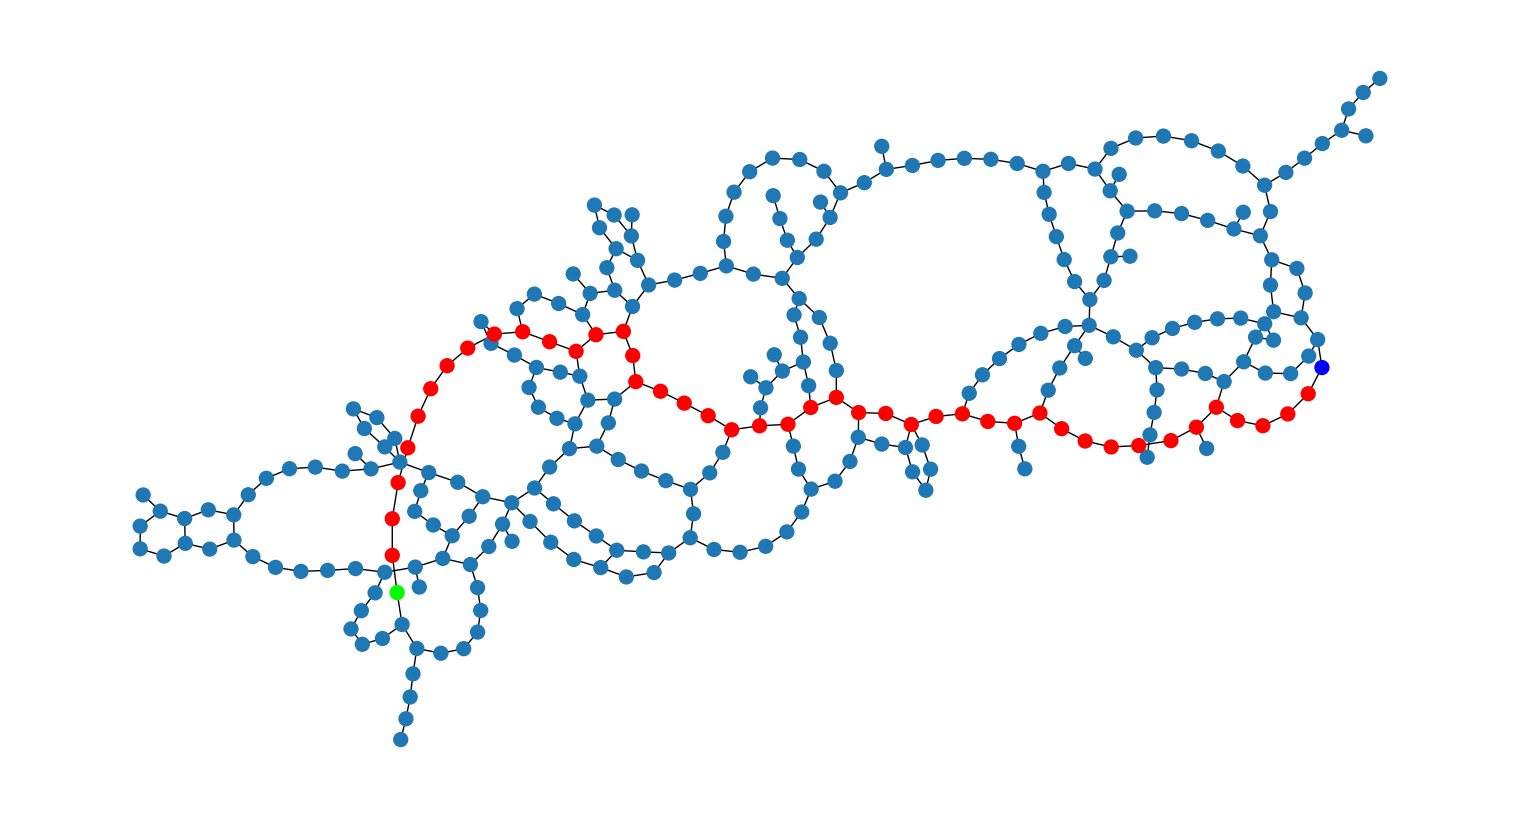

In [5]:
# Mostrem el laberint com un graf.
plt.figure(figsize=(15,8))

# Definim el color dels nodes.
# Si el node és el punt A (inici) el pintem verd, si es el node B (final) el pintem blau, si es un node del camí, vermell i finalment
# deixem el color per defecte de networkx per a la resta de nodes.

colorA, colorB, colorPTH, colorDEF = '#00ff00', '#0000ff', '#ff0000', '#1f78b4'
color_map = [colorA if n==A else colorB if n==B else colorPTH if n in pth else colorDEF for n in G.nodes]

# Existeixen moltes formes diferents de dibuixar els graphs. La Kamada-Kawai ens permet veure el graf com un 'graf de força'.
# Aquests tipus de visualitzacions intenten que les arestes no se superposin.
pos = nx.kamada_kawai_layout(G).items()

# Transformem en un diccionari.
pos = {k: v for k,v in pos}

# Dibuixem el graf definint la posició, el color i la mida de cada node.
nx.draw(G, pos=pos, node_color=color_map, node_size=100)

<div class="alert alert-success">
<h1>Problema 1: BFS (2,5p)</h1>
<p>
    Implementeu l'algorisme <b>BFS</b>. Donat un graf de la llibreria networX, la funció <b>bfs()</b> ha de retornar les caselles accessibles des del paràmetre <b>origin</b>, incloent-hi aquesta, en l'ordre d'exploració. És a dir, la llista retornada sempre inclourà, com a mínim, el node orígen.<br>
    Recordeu que és necessari <b>no canviar l'estructura de la funció</b>. No canvieu ni el nom de la funció, ni el nom dels paràmetres d'entrada ni els de sortida. <br>
</p>    
    
</div>

In [6]:
def bfs(G, origin):
    """
    Params
    ======    
    :G: Graf. Ha de ser un objecte de la classe nx.Graph
    :origin: Índex del node orígen
    
    Returns
    =======
    :visited: El conjunt de nodes visitats durant l'exploració BFS en l'ordre en que han estat explorats
    """

    queue = [origin] # Cua on guardem els nodes a visitar
    visited = [origin] # Llista amb els nodes visitats

    while queue: 
        v = queue.pop(0) # Extraiem el primer node de la cua
        for u in G.neighbors(v): # Iterem per capas
            if u not in visited:
                queue.append(u)
                visited.append(u)

    return visited

Des de la cel·la 24 podem accedir a 26 caselles
Ordre d'exploració: [24, 31, 23, 38, 22, 29, 15, 30, 14, 16, 37, 21, 17, 44, 28, 18, 43, 45, 35, 19, 25, 42, 46, 36, 20, 32]


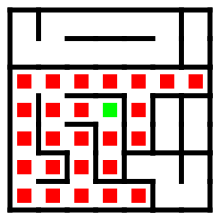

In [7]:
# Obtenim el graph associat al laberint on cada node es una cel·la i tindrem una aresta si entre dues cel·les no existeix paret
maze = Maze(7, 7, p_build=0.2, seed=24)
G = maze.maze_graph()

A = 24                    
visited = bfs(G, A)
num = len(visited)

print(f"Des de la cel·la {A} podem accedir a {num} caselles")
print(f"Ordre d'exploració: {visited}")
maze.set_values(visited, 1, color=(255,0,0))
maze.set_value(A, 1, color=(0,255,0))

maze.display_maze(plot_path=True, height=200)

Des de la cel·la 174 podem accedir a 303 caselles
Ordre d'exploració: [174, 124, 173, 123, 172, 122, 171, 72, 170, 121, 73, 220, 120, 23, 219, 270, 22, 24, 218, 271, 320, 21, 74, 25, 217, 321, 221, 319, 71, 75, 267, 167, 322, 318, 70, 76, 266, 117, 168, 166, 272, 323, 268, 317, 20, 26, 77, 265, 118, 169, 216, 116, 222, 324, 269, 316, 19, 27, 264, 119, 66, 325, 315, 69, 28, 263, 67, 275, 314, 68, 78, 213, 17, 225, 313, 18, 79, 214, 16, 226, 224, 29, 15, 223, 30, 65, 273, 80, 31, 115, 130, 32, 114, 131, 180, 33, 82, 64, 81, 230, 179, 34, 132, 14, 231, 129, 229, 178, 84, 133, 13, 232, 128, 279, 85, 134, 12, 63, 182, 127, 35, 135, 184, 11, 181, 183, 126, 36, 185, 136, 234, 61, 233, 86, 186, 137, 284, 60, 236, 138, 283, 10, 110, 235, 139, 282, 111, 109, 285, 189, 59, 239, 9, 58, 289, 8, 57, 108, 290, 7, 158, 340, 291, 6, 208, 339, 341, 56, 5, 209, 338, 342, 106, 4, 259, 159, 337, 343, 107, 54, 258, 160, 336, 293, 157, 104, 53, 210, 286, 243, 156, 103, 154, 52, 3, 211, 260, 193, 155, 102, 20

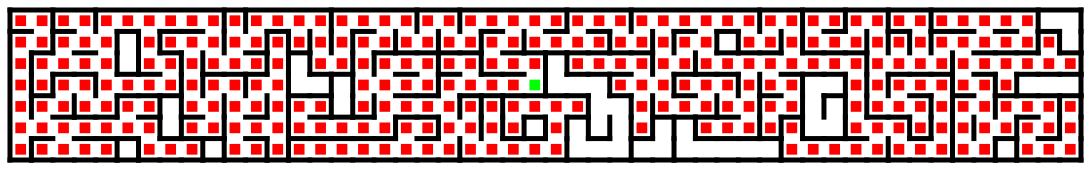

In [8]:
# Obtenim el graph associat al laberint on cada node es una cel·la i tindrem una aresta si entre dues cel·les no existeix paret
maze = Maze(50, 7, p_build=0.2, seed=102)
G = maze.maze_graph()

A = 174                      
visited = bfs(G, A)
num = len(visited)

print(f"Des de la cel·la {A} podem accedir a {num} caselles")
print(f"Ordre d'exploració: {visited}")
maze.set_values(visited, 1, color=(255,0,0))
maze.set_value(A, 1, color=(0,255,0))

maze.display_maze(plot_path=True, height=150)

<div class="alert alert-success">
<h1>Problema 2: Holes (2,5p)</h1>
<p>
    Implementeu una funció anomenada <b>holes()</b> que, donat un graf, un node orígen, un node destí, i un diccionari de nodes amb penalitzacions, trobi el camí més curt entre orígen i destí.<br>
    Si el camí passa per un dels nodes del diccionari, el cost de visitar el node serà la penalització en comptes de ser cost 1.<br>
    Heu de basar la vosta solució en l'algorisme <b>Dijkstra</b>.
</p>    
    
</div>

In [9]:
def holes(G, origin, destination, holes_dct={}):
    """
    Params
    ======
    :G: Graf del qual en volem extreure el camí mínim. Ha de ser un objecte de la classe nx.Graph
    :origin: Índex del node orígen
    :destination: Índex del node destí
    :holes_dct: Un diccionari del tipus {node: penalització}. Passar per cada node del diccionari té un cost diferent a 1.
    
    Returns
    =======
    :path: Una llista de nodes del camí més curt entre els nodes 'origin' i 'destination' (ambdós inclosos).
    :cost: Un enter amb el cost de recórrer el camí, incloent-hi les penalitzacions.
    """

    def dijkstra():
        """
        TODO
        """
        queue = [(G.nodes[origin]['d'], origin)]
        while queue:
            _, v = queue.pop(0)
            for u in G.neighbors(v): # Calculem el cost del seguent node en funció del seu cost
                if u in holes_dct:
                    d = G.nodes[v]['d'] + holes_dct[u]
                else:
                    d = G.nodes[v]['d'] + 1

                # Si el cost es mes baix que l'actual el cambiem y el tornem a posar a la cua
                if d < G.nodes[u]['d']:
                    G.nodes[u].update({'d': d, 'p': v})
                    queue.append((G.nodes[u]['d'], u))
                    queue.sort()    
                
                if u == destination:
                    return
    
    def build_path(v):
        """
        TODO
        """
        path = []
        while G.nodes[v]['p'] != None:
            path.append(v)
            v = G.nodes[v]['p']
        return path

    # Inicialitzem els atributs dels nodes
    G.nodes[origin].update({'d': 0, 'p': None}) # d = distance, p = parent
    for v in G.nodes():
        if v != origin:
            G.nodes[v].update({'d': float('inf'), 'p': None})

    dijkstra() # Calculem el camí mínim per cada node
    
    return build_path(destination), G.nodes[destination]['d']


Cost total: 44
Longitud del camí: 44


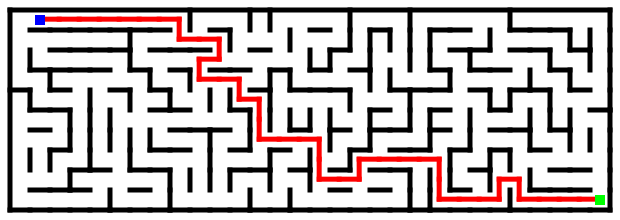

Cost total: 55
Longitud del camí: 54


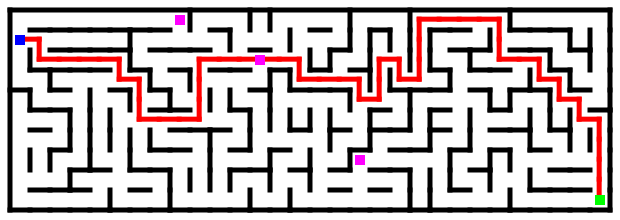

Cost total: 54
Longitud del camí: 46


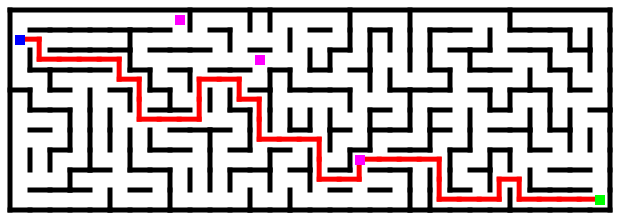

In [13]:
# Proveu el vostre algorisme!

maze = Maze(30, 10, seed=15)

# Obtenim el graph associat al laberint on cada node es una cel·la i tindrem una aresta si entre dues cel·les no existeix paret
G = maze.maze_graph()

A = 0
B = len(G.nodes)-1
color = (255, 0, 255)

h_dcts = [
    {}, # Sense penalització
    {8:20, 72:2, 227:10},
    {8:15, 72:10, 227:9},
]
for holes_dct in h_dcts:
    maze.set_values(list(holes_dct.keys()), 1, color)
    path, cost = holes(G, A, B, holes_dct)

    maze.set_path(path)
    print(f"Cost total: {cost}")
    print('Longitud del camí:', len(path))
    maze.display_maze(plot_path=True, height=200)

    maze.set_values(list(holes_dct.keys()), 0, color)

<div class="alert alert-success">
<h1>Problema 3: Checkpoint (2,5p)</h1>
<p>
    Implementeu una funció anomenada <b>checkpoint()</b> que, donat un graf, un node origen, un node destí i un node extra, trobi el camí més curt des del node origen fins el node destí passant pel node extra. Com en l'exercici anterior, tindrem un diccionari de punts on aplicarem una penalització.<br>
</p>    
    
</div>

<div class="alert alert-warning">
<p>
    Quina és la complexitat d'aquest algorisme?</b><br>
</p>    

 << RESPOSTA AQUÍ >>
    
</div>

In [147]:
def checkpoint(G, origin, destination, extra, holes_dct={}):
    """
    Params
    ======
    :G: Graf del qual en volem extreure el camí mínim. Ha de ser un objecte de la classe nx.Graph
    :origin: Índex del node orígen
    :destination: Índex del node destí
    :extra: Índex d'un node extra per on ha de passar el camí
    :holes_dct: Un diccionari del tipus {node: penalització}. Passar per cada node del diccionari té un cost diferent a 1.
    
    Returns
    =======
    :path: Una llista de nodes del camí més curt entre els nodes 'origin' i 'destination' que passa per 'extra'.
    :cost: Un enter amb el cost de recórrer el camí, incloent-hi les penalitzacions.
    """
    def dijkstra(start_node):
        """
        TODO
        """
        queue = [(G.nodes[start_node]['d'], start_node)]

        while queue:
            _, v = queue.pop(0)
            for u in G.neighbors(v): # Calculem el cost del seguent node en funció del seu cost
                if u in holes_dct:
                    d = G.nodes[v]['d'] + holes_dct[u]
                else:
                    d = G.nodes[v]['d'] + 1

                # Si el cost es mes baix que l'actual el cambiem y el tornem a posar a la cua
                if d < G.nodes[u]['d']:
                    G.nodes[u].update({'d': d, 'p': v})
                    queue.append((G.nodes[u]['d'], u))
                    queue.sort()    
    
    def build_path(start, end):
        """
        TODO
        """
        path = []
        v = end
        while G.nodes[v]['p'] != start:
            path.append(v)
            v = G.nodes[v]['p']
        return path

    def initialize_nodes(start_node):
        G.nodes[start_node].update({'d': 0, 'p': None})

        for nei in G.nodes():
            if nei != start_node:
                G.nodes[nei].update({'d': float('inf'), 'p': None})

def
    initialize_nodes(origin)
    dijkstra(origin) # Calculem el camí mínim per cada node desde l'origen
    p1 = build_path(origin, extra)

    initialize_nodes(extra)
    dijkstra(extra) # Calculem el camí mínim per cada node desde el checkpoint
    p2 = build_path(extra, destination)
    
    return p1, 0

<div class="alert alert-success">
<h1>Problema 4: Checkpoints list (2,5p)</h1>
<p>
    Implementeu una funció anomenada <b>checkpoints_list()</b> que, donat un graf, un node origen, un node destí i una llista de nodes extres, trobi el camí més curt des del node origen fins el node destí passant per tots els nodes extra, en l'ordre més òptim. Com en l'exercici anterior, tindrem un diccionari de punts on aplicarem una penalització.<br>
    <b>Ajuda</b>: Podeu fer servir la funció <b>itertools.permutations</b>.
</p>    
    
</div>

<div class="alert alert-warning">
<p>
    Quina és la complexitat d'aquest algorisme?</b><br>
</p>    

 << RESPOSTA AQUÍ >>
    
</div>

In [13]:
def checkpoints_list(G, origin, destination, extras, holes_dct={}):
    """
    Params
    ======
    :G: Graf del qual en volem extreure el camí mínim. Ha de ser un objecte de la classe nx.Graph
    :origin: Índex del node orígen
    :destination: Índex del node destí
    :extras: Llista d'índexs de nodes per on ha de passar el camí.
    :holes_dct: Un diccionari del tipus {node: penalització}. Passar per cada node del diccionari té un cost diferent a 1.
    
    Returns
    =======
    :path: Una llista de nodes del camí més curt entre els nodes 'origin' i 'destination' que passa per tots els nodes 'extras'.
    :cost: Un enter amb el cost de recórrer el camí, incloent-hi les penalitzacions.
    """
    
    path = []
    cost = 0
    
    return path, cost

El cost del camí més curt que passa per E és: 0
La distàcia del camí més curt que passa per E és: 0


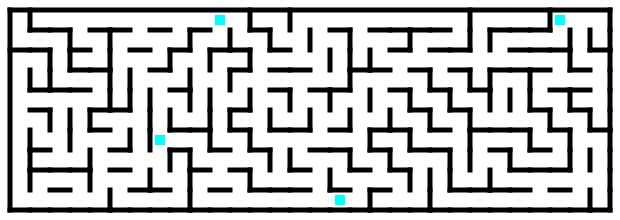

El cost del camí més curt que passa per E és: 0
La distàcia del camí més curt que passa per E és: 0


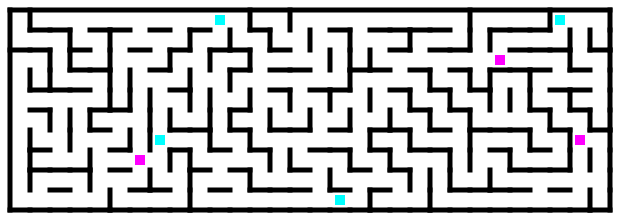

El cost del camí més curt que passa per E és: 0
La distàcia del camí més curt que passa per E és: 0


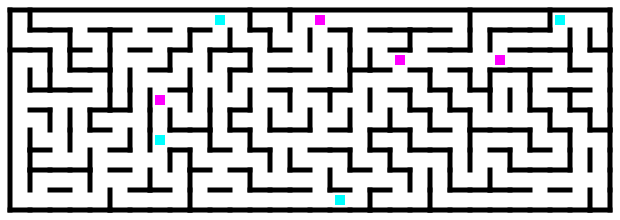

In [14]:
# Proveu el vostre algorisme!

# Creem un laberint i n'extraiem el graph
maze = Maze(30, 10, seed=25)
G = maze.maze_graph()

# Definim l'inici, el fi i node extres
A = 20
B = len(G.nodes)-1
E = [10,187, 286, 27]

h_dcts = [
    {}, # Sense penalització
    {216:200, 208:30, 84:50},
    {79:500, 127:100, 84:5, 15: 500}
]
for holes_dct in h_dcts:
    # La funció set_values ens permet 'activar' nodes per a que surtin dibuixat al laberint.
    maze.set_values(E, 1)                        # Checkpoint
    maze.set_values(list(holes_dct.keys()), 1, (255,0,255))  # Penalitzacions

    path, cost = checkpoints_list(G, A, B, E, holes_dct)
    print(f'El cost del camí més curt que passa per E és: {cost}')
    print('La distàcia del camí més curt que passa per E és:', len(path))
    maze.set_path(path)
    maze.display_maze(plot_path=True, height=200)

    # De la mateixa forma la funció set_values també ens permet 'desactivar' els nodes.
    maze.set_values(E, 0)
    maze.set_values(list(holes_dct.keys()), 0, (255,0,255))

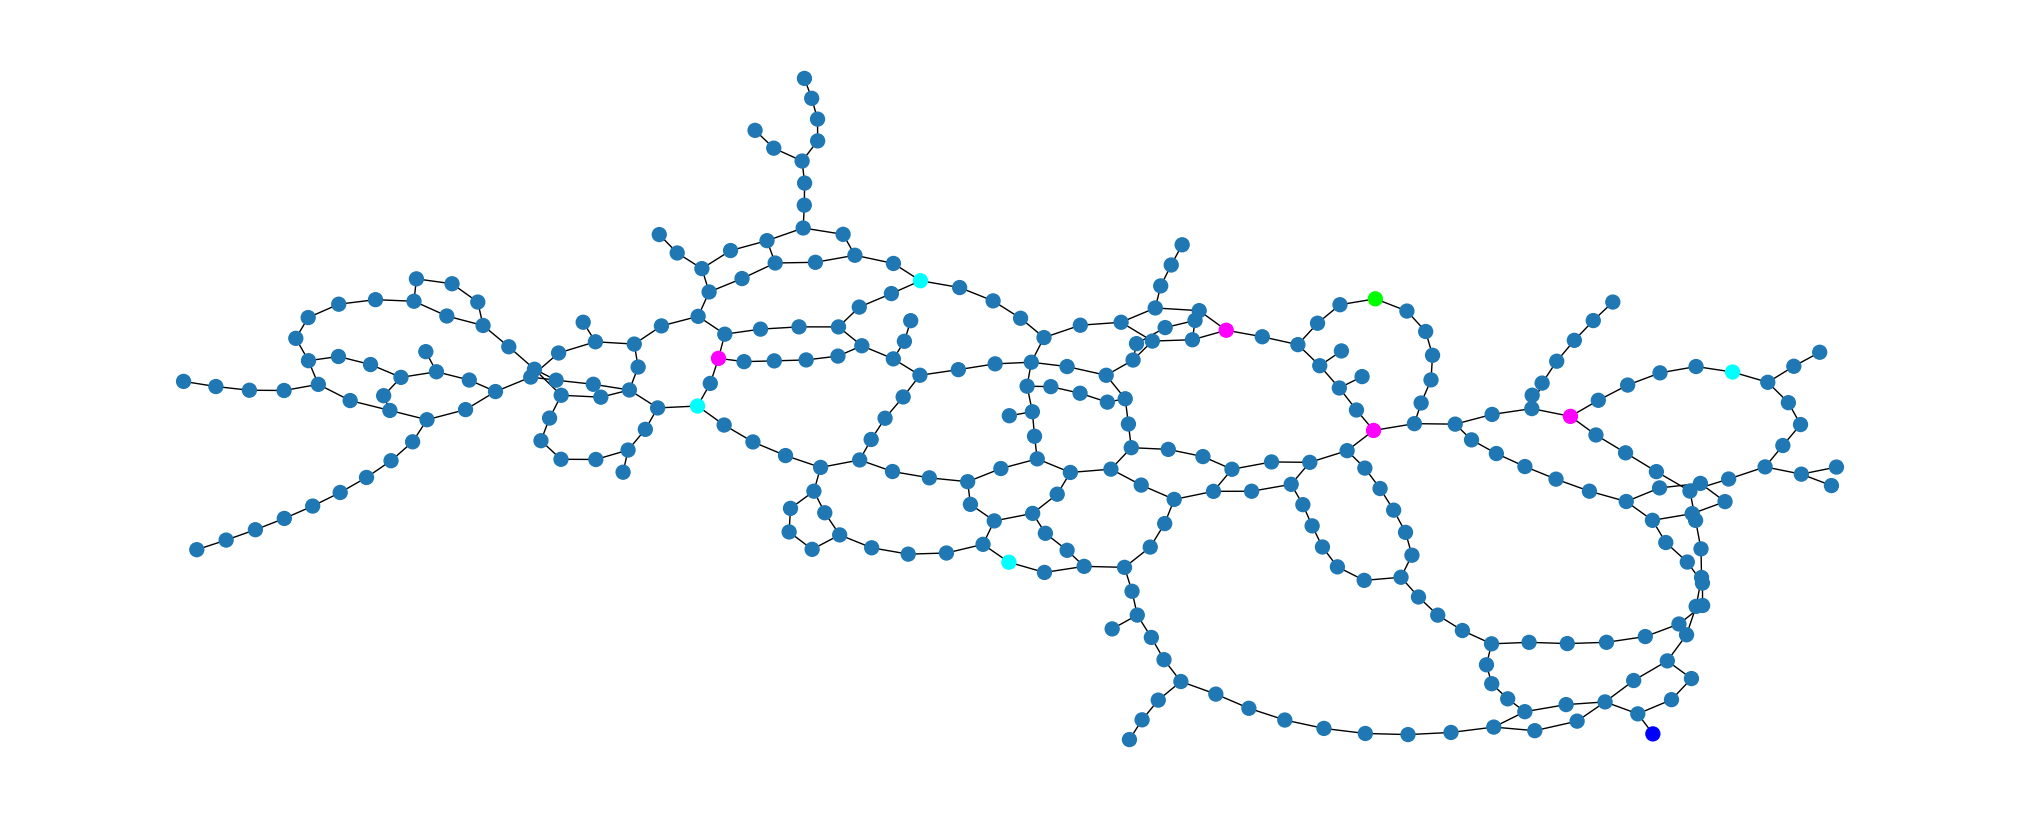

In [15]:
plt.figure(figsize=(20,8))

colorA, colorB, colorE, colorP, colorPTH, colorDEF = '#00ff00', '#0000ff', '#00ffff', '#ff00ff', '#ff0000', '#1f78b4'
color_map = [colorA if n==A else colorB if n==B else colorE if n in E else colorP if n in holes_dct else colorPTH if n in path else colorDEF for n in G.nodes]

pos = nx.kamada_kawai_layout(G).items()

pos = {k: v[::-1] for k,v in pos}

# Dibuixem el graf definint la posició, el color i la mida de cada node.
nx.draw(G, pos=pos, node_color=color_map, node_size=100)

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>

<p>
L'entrega es farà a través del campus virtual. Teniu fins el dia <b>15 d'Octubre a les 23:59</b> per entregar la pràctica. A la tasca que obrirem al campus, només heu d'entregar aquest fitxer .ipynb (No entregueu maze.py ni cap altre fitxer extra). El notebook ha de tenir com a nom:
</p>
<p>
    <code>Grup_Cognom1_Nom1_Grup_Cognom2_Nom2_Exploracio.ipynb</code>
</p>
On 'Grup' és una sola lletra que identifica el <b>grup de laboratori</b> on esteu matriculats (A, B, C, D, E, F). <b>Només ha d'entregar un dels dos membres de la parella.</b>

És imprescindible que respecteu el format de les funcions i que el vostre codi estigui degudament comentat.<br><br>
</div>